# Data Preprocessing 

## Importing the libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

## Importing the dataset

In [48]:
df = pd.read_csv('combined_data.csv')

In [49]:
print(df)
# print(X)
# print(y)

           ad_id    list_id     list_time           date  account_id  \
0      149173109  109212357  1.712927e+12   3 ngày trước     4735114   
1      156266188  115304264  1.712549e+12   1 tuần trước    19890442   
2      156220843  115265512  1.712246e+12   2 tuần trước     9809355   
3      155978499  115057158  1.711619e+12   3 tuần trước    25481412   
4      155935060  115019801  1.711522e+12   3 tuần trước     3737279   
...          ...        ...           ...            ...         ...   
10795  154849506  114082287  1.708760e+12  2 tháng trước    11242900   
10796  155894586  114984858  1.711428e+12   3 tuần trước    13330204   
10797  156255700  115295208  1.713156e+12    2 giờ trước    20522540   
10798  156287545  115324960  1.712449e+12   1 tuần trước     1198923   
10799  154736189  113984591  1.708481e+12  2 tháng trước    22312532   

       projectid  project_oid                       account_oid  \
0           2464   1582239957  b144d70d0cf27d2fb85f9acec319e1ad   
1

### Thay thế dữ liệu thiếu
Các tập dữ liệu thường chứa các giá trị thiếu, điều này có thể gây ra vấn đề cho các thuật toán học máy. Thay thế dữ liệu thiếu được gọi là bù đắp dữ liệu (data imputation).

In [50]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 0, percentage 0.00
>2,  missing entries: 2, percentage 0.02
>3,  missing entries: 0, percentage 0.00
>4,  missing entries: 0, percentage 0.00
>5,  missing entries: 0, percentage 0.00
>6,  missing entries: 0, percentage 0.00
>7,  missing entries: 0, percentage 0.00
>8,  missing entries: 0, percentage 0.00
>9,  missing entries: 0, percentage 0.00
>10,  missing entries: 0, percentage 0.00
>11,  missing entries: 0, percentage 0.00
>12,  missing entries: 0, percentage 0.00
>13,  missing entries: 0, percentage 0.00
>14,  missing entries: 0, percentage 0.00
>15,  missing entries: 0, percentage 0.00
>16,  missing entries: 0, percentage 0.00
>17,  missing entries: 0, percentage 0.00
>18,  missing entries: 0, percentage 0.00
>19,  missing entries: 0, percentage 0.00
>20,  missing entries: 2, percentage 0.02
>21,  missing entries: 2, percentage 0.02
>22,  missing entries: 1032, percentage 9.56
>23,  missing entries: 0, percentage 0.00

<Axes: >

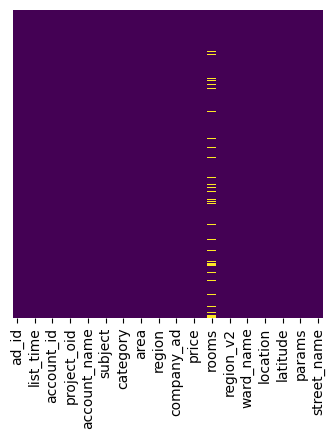

In [51]:
plt.figure(figsize = (4,4)) #hiển thị các giá trị thiếu trong tập dữ liệu
sns.heatmap(dataset.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [52]:
# Điền giá trị trung bình cho các cột dữ liệu thiếu
df['list_time'].fillna(df['list_time'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['rooms'].fillna(df['rooms'].mean(), inplace=True)
df['ward'].fillna(df['ward'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['price_million_per_m2'].fillna(df['price_million_per_m2'].mean(), inplace=True)
df['escrow_can_deposit'].fillna(df['escrow_can_deposit'].mean(), inplace=True)

In [53]:
# Kiểm tra lại DataFrame sau khi điền giá trị thiếu
print(df.isnull().sum())

ad_id                   0
list_id                 0
list_time               0
date                    0
account_id              0
projectid               0
project_oid             0
account_oid             0
account_name            0
state                   0
subject                 0
body                    0
category                0
category_name           0
area                    0
area_name               0
region                  0
region_name             0
company_ad              0
type                    0
price                   0
price_string            2
rooms                   0
size                    0
region_v2               0
ward                    0
ward_name               2
price_million_per_m2    0
location                3
longitude               0
latitude                0
escrow_can_deposit      0
params                  0
zero_deposit            0
street_name             4
dtype: int64


In [54]:
#Chuyển đổi khung dữ liệu thành một mảng gọn gàng bằng cách gọi các giá trị trên khung dữ liệu
X= df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [55]:
from sklearn.impute import SimpleImputer

# Tạo một instance của lớp SimpleImputer: np.nan là giá trị trống trong tập dữ liệu
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# fit trên tập dữ liệu để tính toán thống kê cho mỗi cột
imputer.fit(X[:, 1:3]) 

# Imputer đã fit được áp dụng vào tập dữ liệu 
# để tạo một bản sao của tập dữ liệu với tất cả các giá trị trống 
# cho mỗi cột được thay thế bằng thống kê trung bình được tính toán.
# transform sẽ thay thế và trả về các cột đã cập nhật mới
X[:, 1:3] = imputer.transform(X[:, 1:3])


In [56]:
print(X)

[[149173109 109212357.0 1712926795000.0 ... 2.0
  "[{'id': 'size', 'value': '100 m²', 'label': 'Diện tích sử dụng'}, {'id': 'rooms', 'value': '2 PN', 'label': 'Số phòng ngủ'}]"
  False]
 [156266188 115304264.0 1712549464499.0 ... 2.0
  "[{'id': 'size', 'value': '100 m²', 'label': 'Diện tích sử dụng'}, {'id': 'rooms', 'value': '2 PN', 'label': 'Số phòng ngủ'}]"
  False]
 [156220843 115265512.0 1712246136000.0 ... 2.0
  "[{'id': 'size', 'value': '1000 m²', 'label': 'Diện tích sử dụng'}, {'id': 'rooms', 'value': '3 PN', 'label': 'Số phòng ngủ'}]"
  False]
 ...
 [156255700 115295208.0 1713155908769.0 ... 2.0
  "[{'id': 'size', 'value': '78 m²', 'label': 'Diện tích sử dụng'}, {'id': 'rooms', 'value': '2 PN', 'label': 'Số phòng ngủ'}]"
  False]
 [156287545 115324960.0 1712448540000.0 ... 2.0
  "[{'id': 'size', 'value': '70 m²', 'label': 'Diện tích sử dụng'}, {'id': 'rooms', 'value': '4 PN', 'label': 'Số phòng ngủ'}]"
  False]
 [154736189 113984591.0 1708480762000.0 ... 2.0
  "[{'id': 'size',

## Mã hóa dữ liệu phân loại
#### Mã hóa biến độc lập (X)

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# transformers: xác định loại biến đổi và cột nào cần đổi
# Tuple ('encoder', biến đổi mã hóa, [cột cần đổi])
# remainder = "passthrough" > giữ lại các cột không được đổi. Nếu không, các cột còn lại sẽ không được included
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder="passthrough")

# fit và transform với input là X
# np.array: cần chuyển đổi đầu ra của fit_transform() từ ma trận sang np.array
X = np.array(ct.fit_transform(X))


ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [ ]:
print(X)

#### Mã hóa biến phụ thuộc


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#output of fit_transform of Label Encoder is already a Numpy Array
y = le.fit_transform(y)

In [ ]:
print(y)

## Splitting the dataset (X = data, y = output) into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

## Chuẩn hóa Đặc trưng (


Feature Sc)aling


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
#only use Transform to use the SAME scaler as the Training Set
X_test[:,3:] = sc.transform(X_test[:,3:])

In [ ]:
print(X_train)

In [ ]:
print(X_test)


## 5. Training Machine Learning Model


In [ ]:
## Models from Scikit-Learn: Search "scikit learn model map"
from sklearn.linear_model import LogisticRegression


In [ ]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)

#### 5.1. Evaluate the model

Mỗi mô hình hoặc bộ ước lượng đều có một phương thức tính điểm tích hợp. Phương thức này so sánh xem mô hình đã học được mẫu mức độ tốt như thế nào giữa các đặc trưng và nhãn. Nói cách khác, nó trả về độ chính xác của mô hình của bạn.




In [ ]:
# Evaluate the model on the training set
logistic_clf.score(X_train, y_train)

In [ ]:
# Evaluate the model on the test set
logistic_clf.score(X_test, y_test)

In [ ]:
y_preds = logistic_clf.predict(X_test)
y_preds

In [ ]:
y_test

In [ ]:
#Predict with a single input
logistic_clf.predict([[0.0, 0.0, 1.0, -0.19159184384578545, -1.0781259408412425]])